In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import seaborn as sns

from sklearn.metrics import accuracy_score,f1_score # pour voir l'efficacité globale du modèle
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


# EXO 1

# Création du dataset

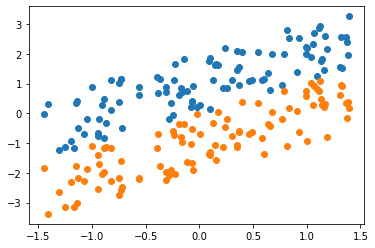

In [107]:
n= 100
X = (3*(npr.random(n)-0.5)).reshape(-1,1)
Y_p = X + (2*(npr.random(n))).reshape(-1,1)
Y_m = X- (2*(npr.random(n))).reshape(-1,1)
P = np.ones(n).reshape(-1,1)
M = -np.ones(n).reshape(-1,1)

plt.scatter(X,Y_p)
plt.scatter(X,Y_m)

In [108]:
data_p = pd.DataFrame(np.hstack([X,Y_p,P]))
data_m = pd.DataFrame(np.hstack([X,Y_m,M]))
data = pd.concat([data_p,data_m],ignore_index=True)
data

,0,1,2
0,-0.821973,0.116864,1.0
1,0.836336,2.545526,1.0
2,-0.729156,1.142078,1.0
3,0.236195,2.186974,1.0
4,1.125003,2.921074,1.0
...,...,...,...
195,-0.110793,-1.652311,-1.0
196,-0.147325,-0.359576,-1.0
197,0.486617,-0.618318,-1.0
198,-1.195890,-2.309694,-1.0


# SVM linéaire

In [113]:

x = data.iloc[:, 0:2]  # Les deux premières colonnes sont les caractéristiques
y = data.iloc[:, 2]    # La troisième colonne est l'étiquette

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Entraînement du modèle SVM
svm_model = SVC(kernel='linear',C=1000,probability=True)  # Vous pouvez changer le noyau si nécessaire
svm_model.fit(X_train, y_train)


SVC(C=1000, kernel='linear', probability=True)

In [114]:
y_test_pred = svm_model.predict(X_test)
print(f"accuracy_score = {accuracy_score(y_test,y_test_pred):.2f}")

accuracy_score = 1.00


In [115]:

# Récupération des vecteurs de support, de leurs indices et du coefficient Beta 0
support_vectors = svm_model.support_vectors_
support_vector_indices = svm_model.support_
intercept = svm_model.intercept_

print(support_vectors,"\n\n",support_vector_indices,"\n\n", intercept)


[[-0.0239943  -0.02964901]
 [ 0.40011732  0.39105379]
 [-0.88881511 -0.83992548]
 [ 0.1022304   0.13222773]] 

 [ 86 150  23 152] 

 [-0.56516522]


# Tracer l'hyperplan

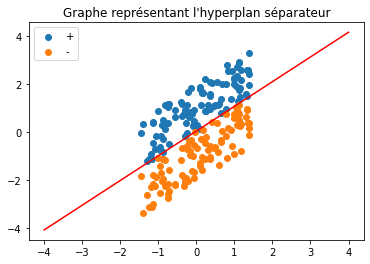

In [116]:
beta = svm_model.coef_[0] 
beta0 = svm_model.intercept_[0]

abscisse = np.linspace(-4,4,1000)
ordonnee = -beta[0]/beta[1]*abscisse - beta0/beta[1]

plt.plot(abscisse,ordonnee,c='r')
plt.scatter(X,Y_p,label='+')
plt.scatter(X,Y_m,label="-")
plt.title("Graphe représentant l'hyperplan séparateur")
plt.legend()

# EXO 2 Make_moon

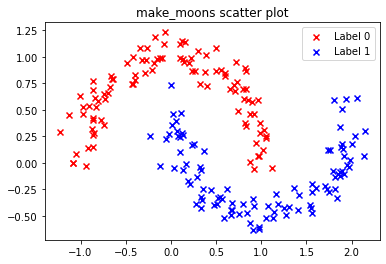

In [2]:
from sklearn.datasets import make_moons

# Génération du jeu de données make_moons
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Conversion en DataFrame pour une meilleure visualisation
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
df.head()

# Création de deux graphes graphique
plt.scatter(df[df.label == 0].x, df[df.label == 0].y, c='red', label='Label 0',marker='x')
plt.scatter(df[df.label == 1].x, df[df.label == 1].y, c='blue', label='Label 1',marker='x')
plt.title("make_moons scatter plot")
plt.legend()
plt.show()


In [19]:
X = df.iloc[:, 0:2]  # Les deux premières colonnes sont les caractéristiques
Y = df.iloc[:, 2]    # La troisième colonne est l'étiquette

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Entraînement du modèle SVM
svm_model = SVC(probability=True)  # Vous pouvez changer le noyau si nécessaire
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [20]:
[x0.ravel(), x1.ravel()]

[array([-2.        , -1.99198397, -1.98396794, ...,  1.98396794,
         1.99198397,  2.        ]),
 array([-2., -2., -2., ...,  2.,  2.,  2.])]

/home/ibotcazou/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


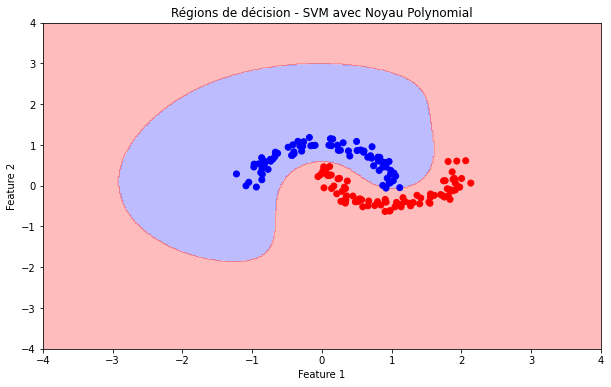

In [24]:


# Création d'une grille pour visualiser les régions de décision
x0, x1 = np.meshgrid(
    np.linspace(-4, 4, 500).reshape(-1, 1),
    np.linspace(-4, 4, 500).reshape(-1, 1),
)
X_new = np.transpose([x0.ravel(), x1.ravel()])

y_predict = svm_model.predict(X_new).reshape(x0.shape)

# Utilisation de matplotlib pour afficher les régions de décision
plt.figure(figsize=(10, 6))
plt.contourf(x0, x1, y_predict, alpha=0.3, cmap='bwr')
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap='bwr')
plt.title("Régions de décision - SVM avec Noyau Polynomial")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()